In [33]:
import random
import sqlite3

def generate_and_save_mTSP_instances_to_db(nr_instances, nr_cities, nr_salesmen, coord_range=(0, 100), db_file="mTSP_instances.sqlite3"):

    # Connect to the database
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # Create the tables
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS instances (
            instance_id INTEGER PRIMARY KEY,
            nr_cities INTEGER,
            nr_salesmen INTEGER
        )
    """)
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS cities (
            city_id INTEGER,
            instance_id INTEGER,
            x INTEGER,
            y INTEGER,
            PRIMARY KEY (city_id, instance_id),
            FOREIGN KEY (instance_id) REFERENCES instances(instance_id)
        )
    """)

    # Find next instance_id
    cursor.execute("SELECT MAX(instance_id) FROM instances")
    result = cursor.fetchone()
    next_instance_id = result[0] + 1 if result[0] is not None else 1

    # Create and save instances
    for instance_id in range(next_instance_id, next_instance_id + nr_instances):

        # instace
        cursor.execute("INSERT INTO instances (instance_id, nr_cities, nr_salesmen) VALUES (?, ?, ?)",
                       (instance_id, nr_cities, nr_salesmen))

        # cities
        for city_id in range(nr_cities + 1):
            x = random.randint(coord_range[0], coord_range[1])
            y = random.randint(coord_range[0], coord_range[1])
            cursor.execute("INSERT INTO cities (city_id, instance_id, x, y) VALUES (?, ?, ?, ?)",
                           (city_id, instance_id, x, y))

    conn.commit()
    conn.close()

    print(f"{nr_instances} mTSP instances were created and added to {db_file}.")


generate_and_save_mTSP_instances_to_db(nr_instances=10, nr_cities=5, nr_salesmen=2, coord_range=(0, 100), db_file="mTSP.sqlite3")

10 mTSP instances were created and added to mTSP.sqlite3.


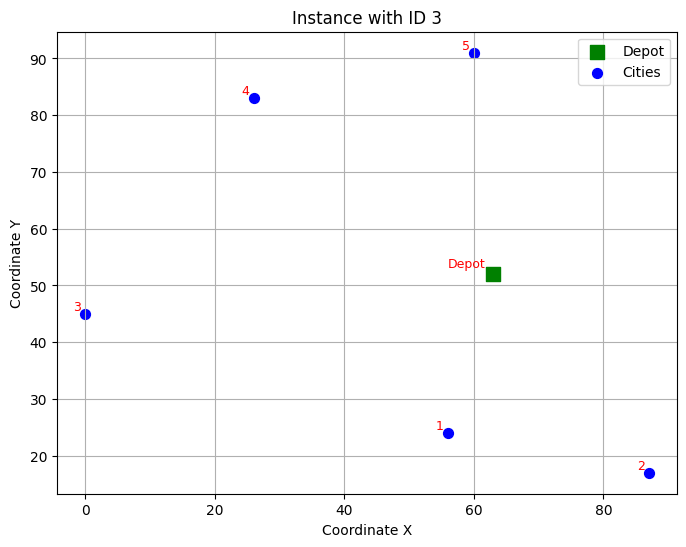

In [59]:
import sqlite3
import matplotlib.pyplot as plt

def plot_mTSP_instance(instance_id, db_file="mTSP_instances.sqlite3"):

    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # Verify if instance exists
    cursor.execute("SELECT * FROM instances WHERE instance_id = ?", (instance_id,))
    instance = cursor.fetchone()
    if instance is None:
        print(f"The instance with the ID {instance_id} does not exist.")
        conn.close()
        return

    # Get city coordinates
    cursor.execute("SELECT city_id, x, y FROM cities WHERE instance_id = ?", (instance_id,))
    cities = cursor.fetchall()

    if not cities:
        print(f"The instance with the ID {instance_id} does not have cities.")
        conn.close()
        return

    conn.close()

    # Plot the cities
    plt.figure(figsize=(8, 6))
    for city_id, x, y in cities:
        if city_id == 0: 
            plt.scatter(x, y, c='green', marker='s', label='Depot', s=100)  
            plt.text(x - 1.2, y + 1.2, 'Depot', fontsize=9, ha='right', color='red')
        else:
            plt.scatter(x, y, c='blue', label='Cities' if city_id == 1 else "", s=50)  
            plt.text(x - 0.6, y + 0.6, str(city_id), fontsize=9, ha='right', color='red')


    plt.title(f"Instance with ID {instance_id}")
    plt.xlabel("Coordinate X")
    plt.ylabel("Coordinate Y")
    plt.grid(True)
    plt.legend()
    plt.show()

# 10, 3
plot_mTSP_instance(instance_id=3, db_file="mTSP.sqlite3")